In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import tensorflow as tf;
import random


Let's load the data and store it to train and test files

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

A preview

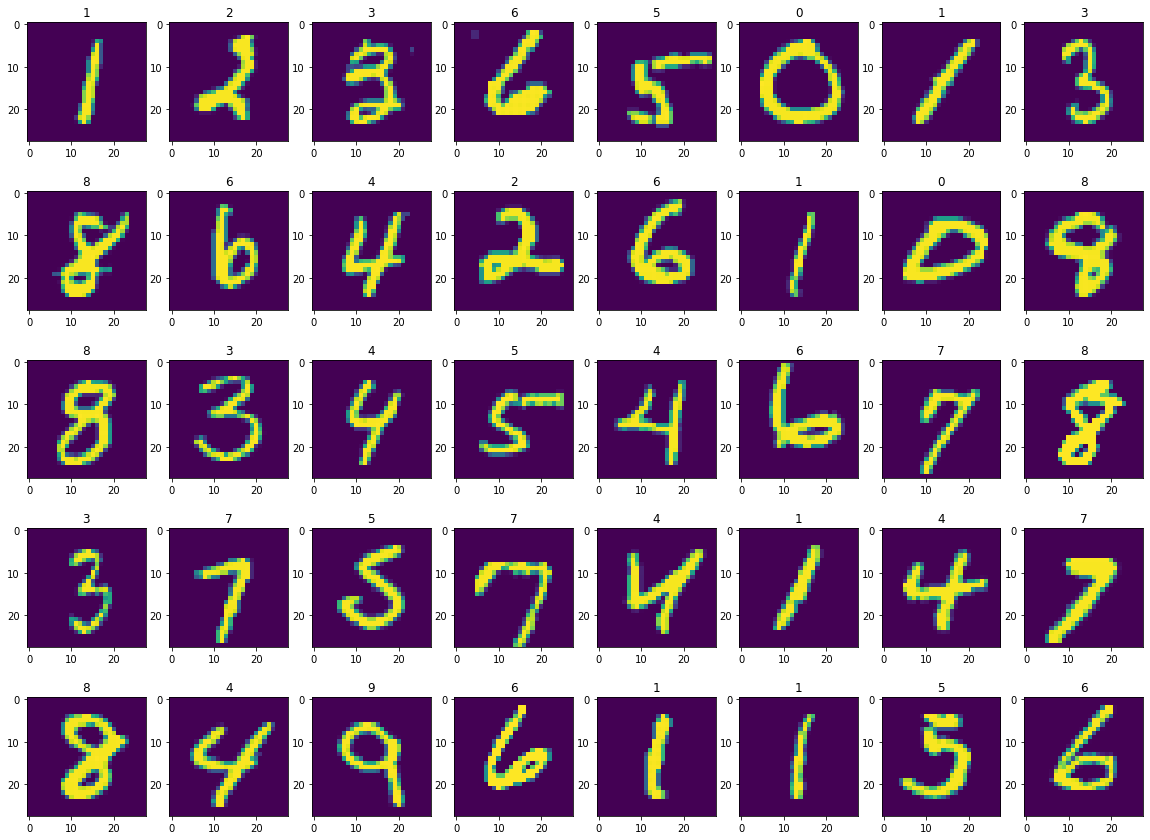

In [4]:
size = 40
plt.figure(figsize=(20, 15))

for i, image in zip(range(1, size+1), X_train):
    choice = random.choice(range(len(X_train)))
    plt.subplot(5, 8, i)
    plt.imshow(X_train[choice])
    plt.title(f"{y_train[choice]}")

In [5]:
X_train, X_test = X_train/255.0, X_test/255.0

In [6]:
X_train, X_test = np.reshape(X_train, (-1, 28, 28, 1)),np.reshape(X_test, (-1, 28, 28, 1))

In [7]:
shape = X_train.shape[1:]
shape

(28, 28, 1)

In [24]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
### Lets now see how to deal with tensorflow

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Input, MaxPooling2D, Dropout, Flatten

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(shape)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
res = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 117s 47ms/step - loss: 0.3541 - accuracy: 0.8864 - val_loss: 0.0447 - val_accuracy: 0.9854
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0391 - val_accuracy: 0.9879
Epoch 3/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0436 - val_accuracy: 0.9868
Epoch 4/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.0335 - val_accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0383 - val_accuracy: 0.9884


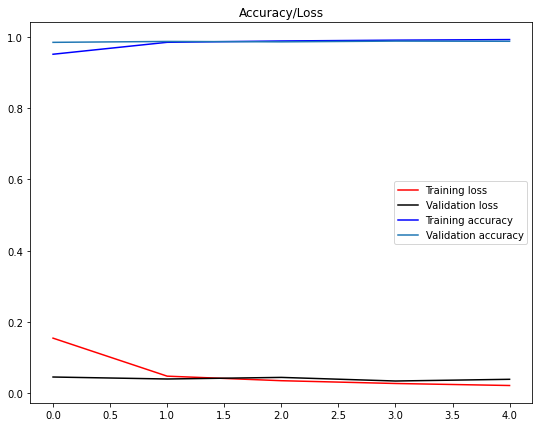

In [14]:
plt.figure(figsize=(9,7))
plt.tight_layout()
plt.plot(res.history["loss"], label="Training loss", c="r")
plt.plot(res.history["val_loss"], label="Validation loss", c="k")
plt.plot(res.history["accuracy"], label="Training accuracy", c="b")
plt.plot(res.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.title("Accuracy/Loss")
plt.show()

313/313 [==============================] - 6s 19ms/step - loss: 0.0383 - accuracy: 0.9884
Score Accuracy :  [0.038278620690107346, 0.9883999824523926]


<AxesSubplot:>

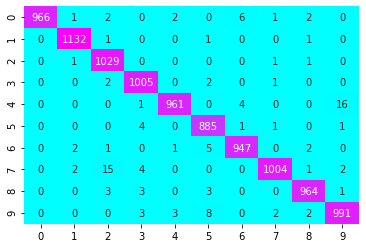

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


prediction = model.predict(X_test).argmax(axis=1)
print("Score Accuracy : ", model.evaluate(X_test, y_test))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cbar=False, cmap='cool', fmt="d")


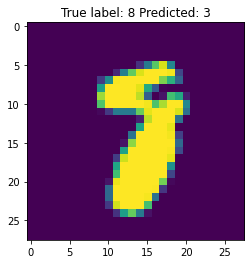

In [21]:
# Show some misclassified examples


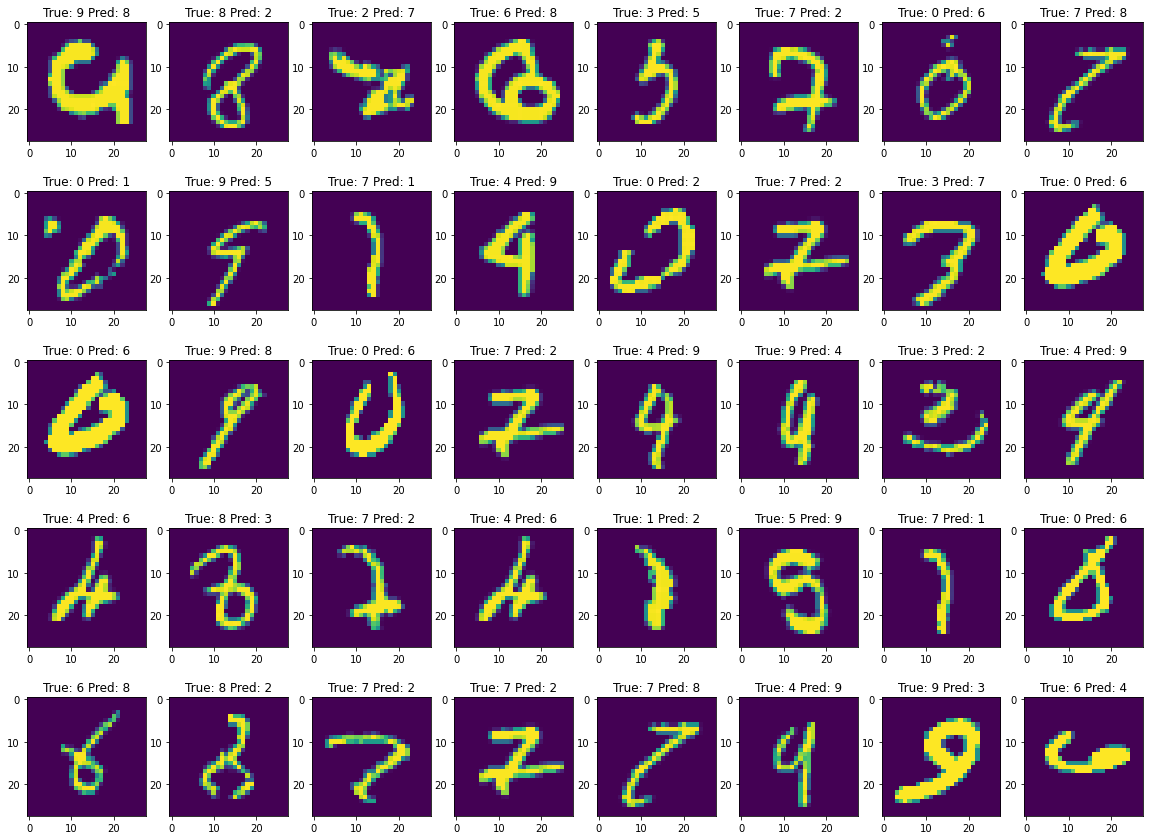

In [23]:
size = 40
plt.figure(figsize=(20, 15))

for k, image in zip(range(1, size+1), X_test):
    i = np.random.choice(misclassified_idx)
    plt.subplot(5, 8, k)
    plt.imshow(X_test[i])
    plt.title("True: %s Pred: %s" % (y_test[i], prediction[i]));
